# mnist-gan

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [4]:
from gan.train import train
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss
from gan.utils import show_images

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


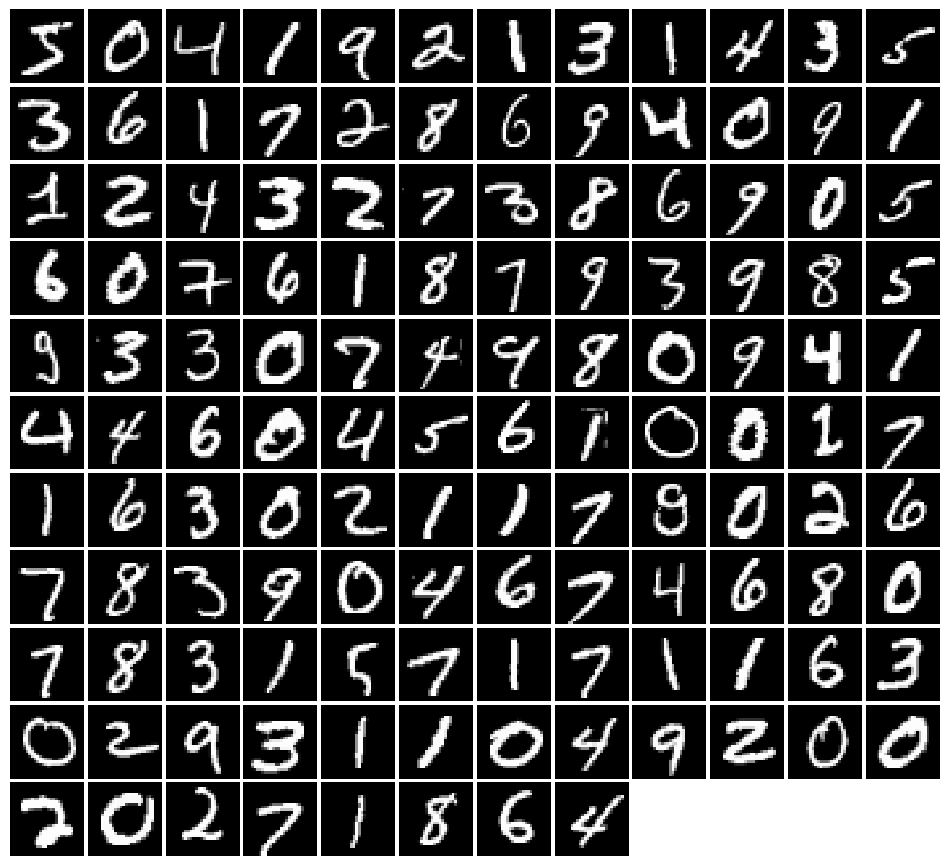

In [6]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)

try:
  imgs = next(iter(loader_train))[0].view(batch_size, 784).numpy().squeeze()
except:
  imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()

show_images(imgs)

# Discriminator and Generator


In [7]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [8]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256),
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256),
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [9]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """

    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.403, G:0.7062


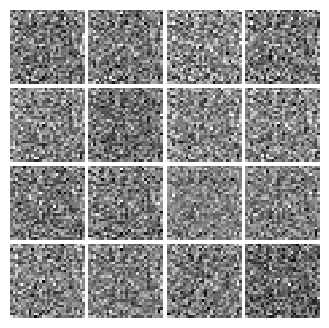


Iter: 250, D: 1.473, G:0.5605


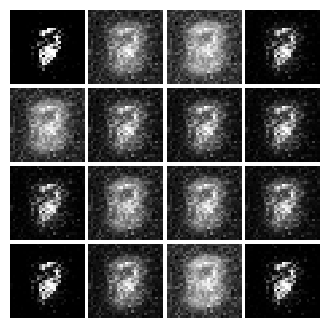


EPOCH:  2
Iter: 500, D: 1.086, G:1.214


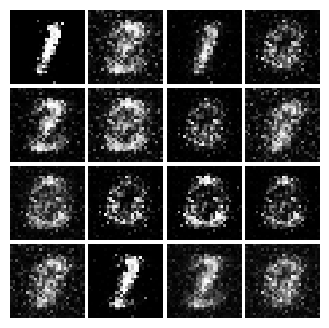


Iter: 750, D: 0.9642, G:1.91


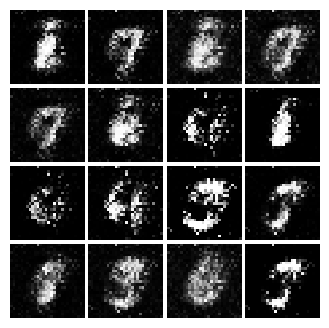


EPOCH:  3
Iter: 1000, D: 1.068, G:2.464


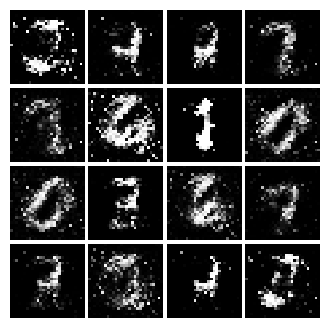


Iter: 1250, D: 1.293, G:0.8495


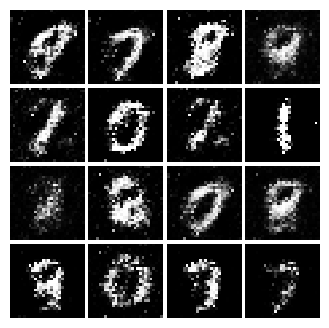


EPOCH:  4
Iter: 1500, D: 1.17, G:1.066


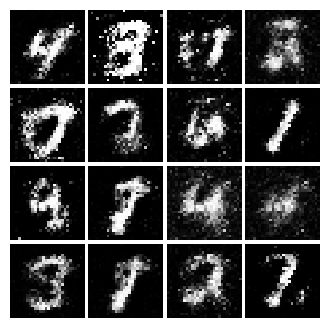


Iter: 1750, D: 1.27, G:1.859


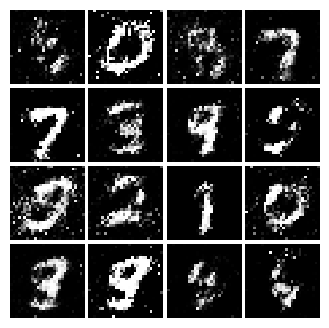


EPOCH:  5
Iter: 2000, D: 1.187, G:1.015


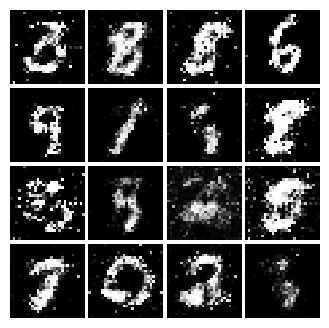


Iter: 2250, D: 1.2, G:0.9037


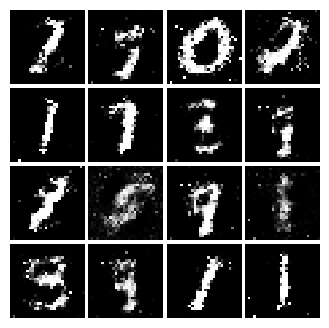


EPOCH:  6
Iter: 2500, D: 1.266, G:0.9795


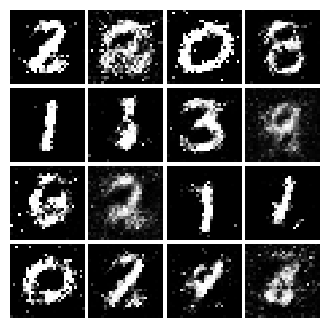


Iter: 2750, D: 1.316, G:0.9011


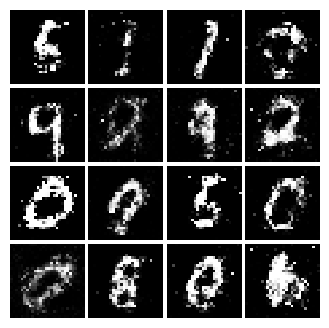


EPOCH:  7
Iter: 3000, D: 1.26, G:0.845


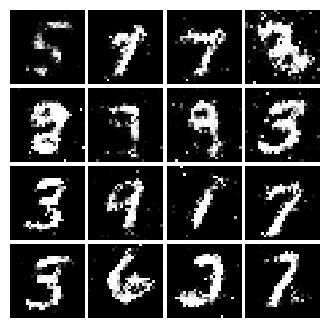


Iter: 3250, D: 1.275, G:0.8927


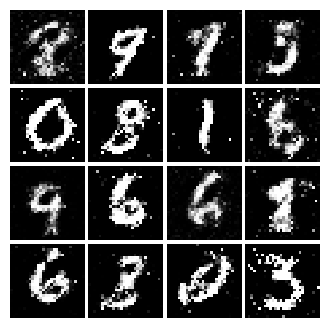


EPOCH:  8
Iter: 3500, D: 1.316, G:0.7904


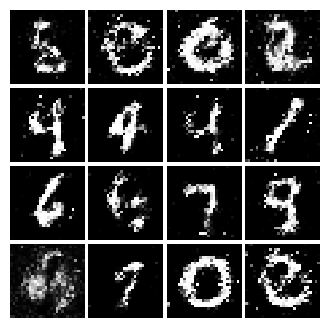


EPOCH:  9
Iter: 3750, D: 1.266, G:0.8896


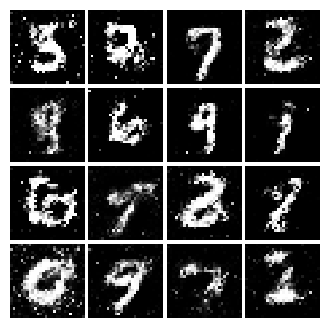


Iter: 4000, D: 1.347, G:0.8642


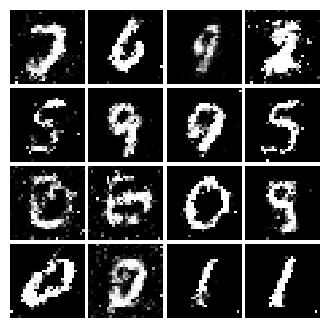


EPOCH:  10
Iter: 4250, D: 1.207, G:0.915


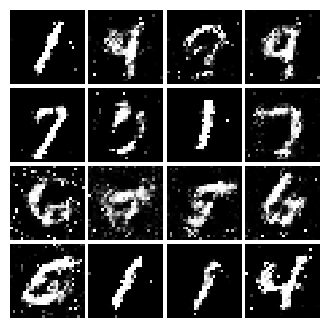


Iter: 4500, D: 1.354, G:0.8048


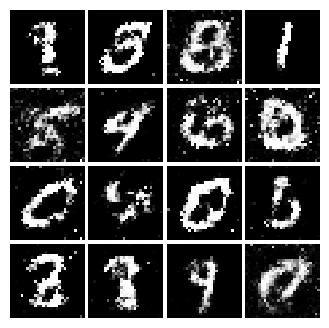

In [29]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.4255, G:0.4914


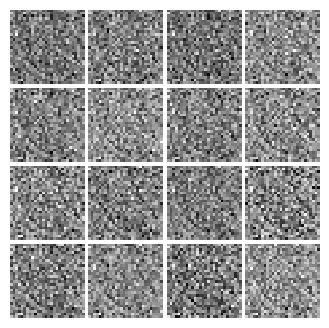


Iter: 250, D: 0.3171, G:0.679


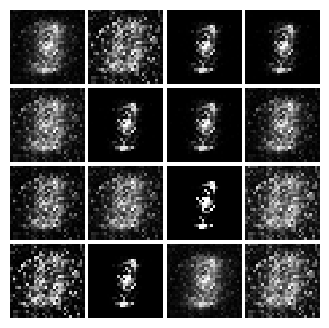


EPOCH:  2
Iter: 500, D: 0.1501, G:0.3852


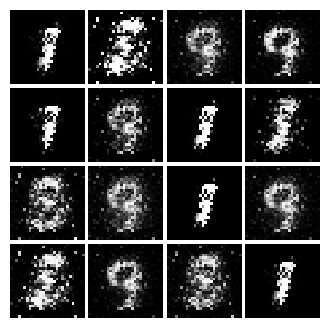


Iter: 750, D: 0.2442, G:0.1633


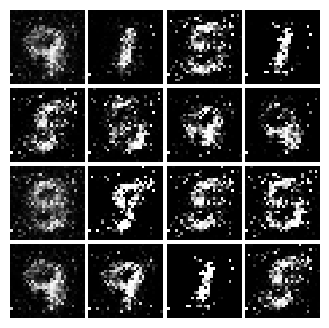


EPOCH:  3
Iter: 1000, D: 0.1449, G:0.06751


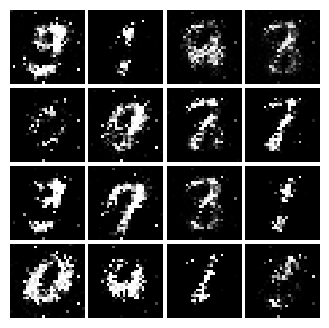


Iter: 1250, D: 0.1401, G:0.2649


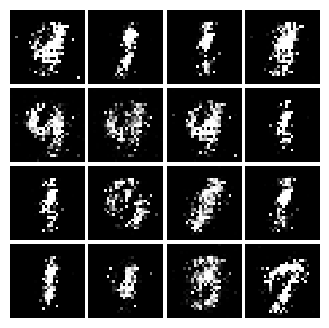


EPOCH:  4
Iter: 1500, D: 0.1388, G:0.3221


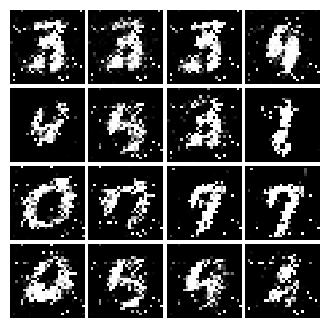


Iter: 1750, D: 0.1667, G:0.2351


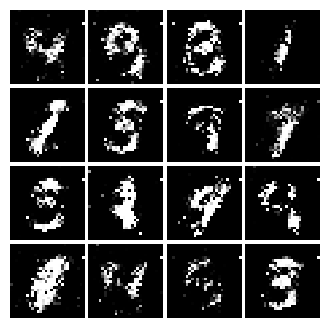


EPOCH:  5
Iter: 2000, D: 0.2152, G:0.1692


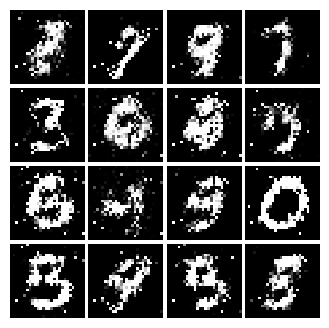


Iter: 2250, D: 0.5158, G:0.1401


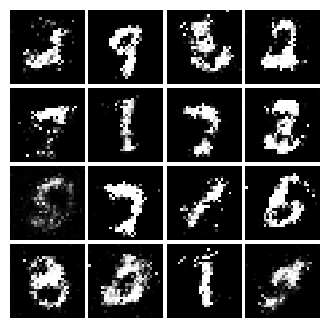


EPOCH:  6
Iter: 2500, D: 0.2137, G:0.156


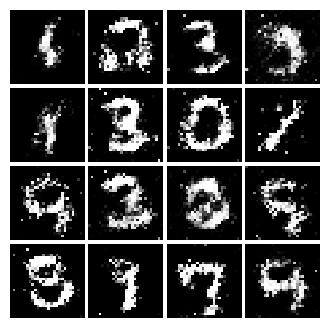


Iter: 2750, D: 0.2311, G:0.1846


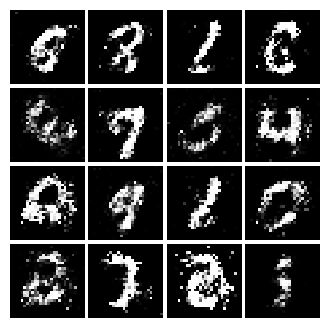


EPOCH:  7
Iter: 3000, D: 0.1993, G:0.1772


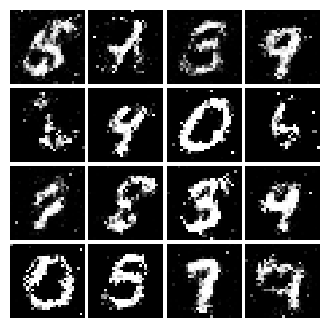


Iter: 3250, D: 0.1937, G:0.1924


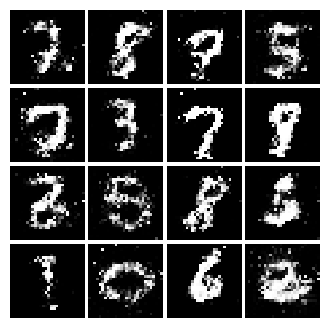


EPOCH:  8
Iter: 3500, D: 0.2052, G:0.1637


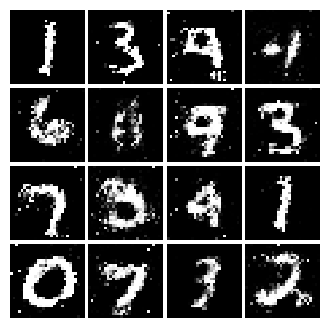


EPOCH:  9
Iter: 3750, D: 0.2018, G:0.1767


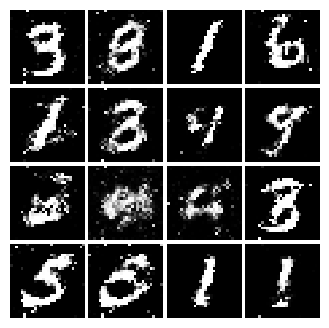


Iter: 4000, D: 0.2617, G:0.1865


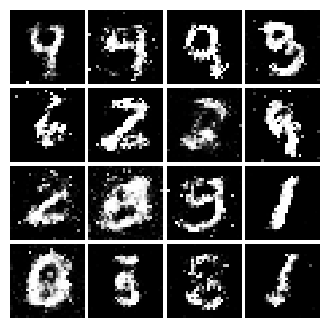


EPOCH:  10
Iter: 4250, D: 0.2324, G:0.1622


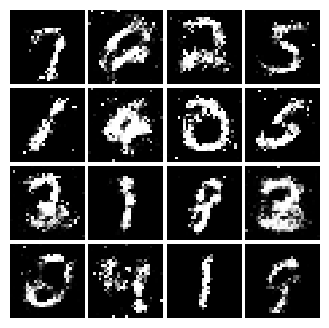


Iter: 4500, D: 0.2369, G:0.1564


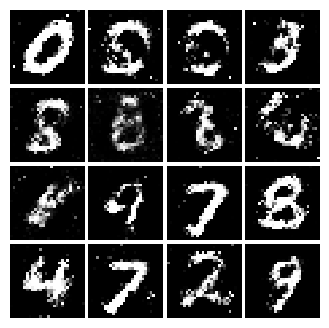

In [30]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)